script to test gym env is working normally

In [590]:
import gymnasium as gym
import gym_BinPack3D
from gym_BinPack3D.envs import Box, Rotate
from stable_baselines3.common.env_checker import check_env
from matplotlib import pyplot as plt
# %matplotlib notebook

In [348]:
env = gym.make('BinPack3D-v0', 
                container_size = (10, 12, 20),
                boxSeqGenerator='random', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY],
                n_foreseeable_box = 1,
                box_set = [Box(10,10,10), Box(50,20,40)]
            )
check_env(env)

UnregisteredEnv: No registered env with id: BinPack3D-v0

In [347]:
env = gym.make('BinPack3D-v0', 
                container_size = (10, 12, 20),
                boxSeqGenerator='random', 
                enabled_rotations = [Rotate.NOOP],
                n_foreseeable_box = 3,
                minSideLen = 2,
                maxSideLen = 5,
            )

check_env(env, warn=False, skip_render_check=False)

UnregisteredEnv: No registered env with id: BinPack3D-v0

In [327]:
obs = env.unwrapped.reset()

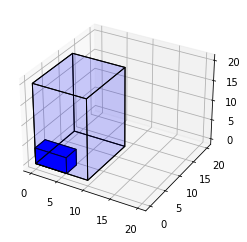

In [247]:
# we cheat to get correct pos to place box, by look at cut process info
box = env.unwrapped.boxSeqGenerator.next_N_boxes()[0]
pos = (box.x,box.y)
pos = env.unwrapped.position_to_actionIdx(pos)
rot = Rotate.NOOP
action = (pos, rot)

new_obs, reward, done, done2, info = env.step(action)
fig = env.render()

In [54]:
import imageio

In [276]:
obs = env.reset()

with imageio.get_writer('cut2_seq.gif', mode='I') as writer:
    while True:
        # we cheat the game by look at cut process info and get the 
        # correct pos to place box, achieving perfect packing
        box = env.unwrapped.boxSeqGenerator.next_N_boxes()[0]
        pos = (box.x,box.y)
        pos = env.unwrapped.position_to_actionIdx(pos)
        rot = Rotate.NOOP
        action = (pos, rot)

        obs, reward, done, done2, info = env.step(action)
        print(reward,done,info)
        fig = env.render("rgb_array")
        writer.append_data(fig)

        if done: break

4.166666666666667 False {'counter': 1, 'ratio': 0.4166666666666667}


TypeError: env_render_passive_checker() takes 1 positional argument but 2 were given

In [337]:
box = Box(6,3,4)
env.unwrapped.container.drop_box(box, (0,0))

True

In [338]:
env.container.get_possible_positions(Box(5,5,5))

array([[0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

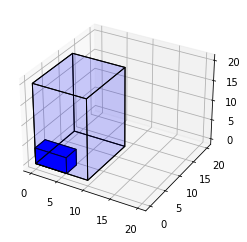

In [339]:
fig = env.render()

In [280]:
env.container.check_box_placement_valid(Box(5,5,5), (0, 0))

-1

In [340]:
env.container.get_box_list()

[(6, 3, 4, 0, 0, 0.0)]

In [341]:
env.container.get_height_map()

array([[4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 4., 4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

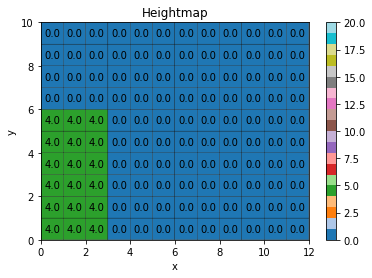

In [342]:
#at the height in the heightmap is the height of the box

fig, ax = plt.subplots()
heightmap = env.container.get_height_map()
heightfig = ax.pcolor(heightmap, edgecolors='black', cmap='tab20', vmin=0, vmax=20)
ax.set_title('Heightmap')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(heightfig)

for i in range(len(heightmap)):
    for j in range(len(heightmap[0])):
        ax.text(j+0.5, i+0.5, heightmap[i,j], 
                ha='center', va='center', color='black')

plt.show()


In [335]:
env.boxSeqGenerator._get_next_box()

AttributeError: 'RandomBoxCreator' object has no attribute '_get_next_box'

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import numpy as np

In [114]:
def plot_parallelepiped(cube_definition, ax, color=None, showEdges=True):
    """
    Draw a 3D parallelepiped to a matplotlib 3d plot
    
    
    cube_definition: corner, plus 3 pts around that corner eg.
            [(0,0,0), (0,1,0), (1,0,0), (0,0,0.1)]
            
    ax: a matplotlib 3d axis obj i.e. from:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            
    modified from: https://stackoverflow.com/questions/44881885/python-draw-parallelepiped
    """
    if color is None: color = (0,0,1,0.1)
        
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    
    #ax = fig.add_subplot(111, projection='3d')
    edgecolors = 'k' if showEdges else (0,0,0,0)
    faces = Poly3DCollection(edges, linewidths=1, edgecolors=edgecolors)
    faces.set_facecolor(color)

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('auto')

In [115]:
def plot_box(box, ax, color=None, showEdges=True):
    """
    box : obj of type Box
    
    ax: a matplotlib 3d axis obj i.e. from:
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
    """
    dx, dy, dz = box.dx, box.dy, box.dz
    x,y,z = box.x, box.y, box.z
    
    cube_definition = [(x,y,z), 
                       (x+dx,y,z),
                       (x,y+dy,z),
                       (x,y,z+dz),
                      ]
    #print (cube_definition)
    plot_parallelepiped(cube_definition, ax, color, showEdges)

In [116]:
def show_env(env):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')



    maxSideLen = max(env.unwrapped.container_size)
    box = Box(maxSideLen,maxSideLen,maxSideLen)
    plot_box(box, ax, color=(0,0,0,0), showEdges=False) # invisible bound box
    
    box = Box(*env.unwrapped.container_size)
    plot_box(box, ax)
    
    for box in env.unwrapped.container.boxes[:-1]:
        plot_box(box, ax, color=(0,0.5,1,1))
    
    box = env.unwrapped.container.boxes[-1]
    plot_box(box, ax, color=(0,0.,1,1))    
    
    return fig
    
    


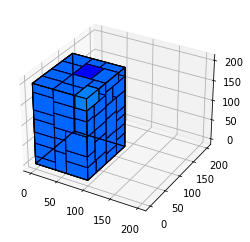

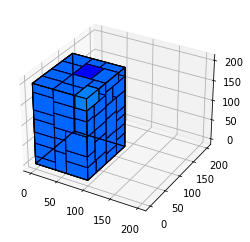

In [118]:
# %matplotlib notebook
test = show_env(env)
test


In [410]:


# Define your environment
env = gym.make('BinPack3D-v0', 
                container_size = (10, 12, 20),
                boxSeqGenerator='random', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY],
                n_foreseeable_box = 1,
                minSideLen = 2,
                maxSideLen = 5,
            )

env.reset()


using random box sequence
Box to be sampled:
Box: Size 1 1 1 Position 0 0 0
Box: Size 2 3 4 Position 0 0 0


({'height_map': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
  'coming_boxes': array([[2., 3., 4.]], dtype=float32),
  'valid_placement_mask': array([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
          [

In [419]:
env.observation_space

Dict('coming_boxes': Box(0.0, 20.0, (1, 3), float32), 'height_map': Box(0.0, 20.0, (10, 12), float32), 'valid_placement_mask': MultiBinary((2, 10, 12)))

In [421]:
env.action_space

MultiDiscrete([120   2])

In [420]:
env.boxSeqGenerator.next_N_boxes()

[Box: Size 2 3 4 Position 0 0 0]

In [413]:
env.step

<bound method OrderEnforcing.step of <OrderEnforcing<PassiveEnvChecker<PackingGame<BinPack3D-v0>>>>>

In [385]:
env.reset()

c:\Users\bente\anaconda3\lib\site-packages\gymnasium\utils\passive_env_checker.py:210: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(


({'height_map': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
  'coming_boxes': array([[1., 1., 1.]], dtype=float32),
  'valid_placement_mask': array([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
          [

In [589]:
import torch
import torch.nn as nn

class Actor(nn.Module):
    def __init__(self, coming_boxes, n_rotations, container_size):
        super(Actor, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * container_size[0] * container_size[1] + coming_boxes * 3, 256)
        self.fc2 = nn.Linear(256, container_size[0] * container_size[1] * n_rotations)

    def forward(self, height_map, coming_boxes, valid_placement_mask=None):
        x = F.leaky_relu(self.conv1(height_map))
        x = F.leaky_relu(self.conv2(x))
        x = F.leaky_relu(self.conv3(x))
        x = F.leaky_relu(self.conv4(x))
        x = F.leaky_relu(self.conv5(x))
        x = x.view(x.size(0), -1)
        valid_placement_mask = valid_placement_mask.view(valid_placement_mask.size(0), -1)
        coming_boxes = coming_boxes.view(coming_boxes.size(0), -1)
        x = torch.cat((x, coming_boxes), dim=1)
        x = F.leaky_relu(self.fc1(x))
        action_prob = F.softmax(self.fc2(x), dim=-1)
        if valid_placement_mask is not None:
            action_prob = action_prob * valid_placement_mask
            action_prob = action_prob / action_prob.sum()
        return action_prob

class Critic(nn.Module):
    def __init__(self, coming_boxes, n_rotations):
        super(Critic, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * container_size[0] * container_size[1] + coming_boxes * 3, 256)
        self.fc2 = nn.Linear(256, container_size[0] * container_size[1] * n_rotations)

    def forward(self, height_map, coming_boxes, valid_placement_mask=None):
        x = F.leaky_relu(self.conv1(height_map))
        x = F.leaky_relu(self.conv2(x))
        x = F.leaky_relu(self.conv3(x))
        x = F.leaky_relu(self.conv4(x))
        x = F.leaky_relu(self.conv5(x))
        x = x.view(x.size(0), -1)
        coming_boxes = coming_boxes.view(coming_boxes.size(0), -1)
        x = torch.cat((x, coming_boxes), dim=1)
        x = F.leaky_relu(self.fc1(x))
        state_value = self.fc2(x)
        if valid_placement_mask is not None:
            state_value = state_value * valid_placement_mask
        return state_value
    
class ACKTR:
    def __init__(self, coming_boxes, n_rotations, container_size, alpha=1, beta=0.5, omega=0.01, psi=0.01):
        self.actor = Actor(coming_boxes, n_rotations, container_size)
        self.critic = Critic(coming_boxes, n_rotations)
        self.alpha = alpha
        self.beta = beta
        self.omega = omega
        self.psi = psi

    def compute_loss(self, height_map, coming_boxes, valid_placement_mask, action, reward, next_height_map, next_coming_boxes, next_valid_placement_mask, done):
        # Compute actor loss
        action_prob = self.actor(height_map, coming_boxes, valid_placement_mask)
        state_value = self.critic(height_map, coming_boxes, valid_placement_mask)
        next_state_value = self.critic(next_height_map, next_coming_boxes, next_valid_placement_mask)
        td_error = reward + next_state_value - state_value
        actor_loss = -td_error.detach() * action_prob.log()

        # Compute critic loss
        critic_loss = td_error.pow(2)

        # Compute entropy loss
        entropy_loss = -(action_prob * action_prob.log())

        # Compute infeasibility loss
        infeasibility_loss = (1 - action_prob)

        # Compute total loss
        loss = self.alpha * actor_loss + self.beta * critic_loss + self.omega * infeasibility_loss - self.psi * entropy_loss
        return loss


In [457]:
import random

# dataset maken
boxes = [Box(5,5,5), Box(5,5,5), Box(5,5,5)]
n_foreseeable_box = 1
coming_boxes = random.sample(boxes, n_foreseeable_box)

In [591]:
import torch.optim as optim
import gym_BinPack3D

n_foreseeable_box = 1
n_rotations = 2
num_episodes = 2
num_steps = 100
container_size = (10, 10, 20)
coming_boxes = coming_boxes


env = gym.make('BinPack3D-v0', 
                container_size = (10, 10, 20),
                boxSeqGenerator='random', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY],
                n_foreseeable_box = 1,
                minSideLen = 5,
                maxSideLen = 5,
            )

acktr = ACKTR(n_foreseeable_box, n_rotations, container_size)
optimizer = optim.Adam(list(acktr.actor.parameters()) + list(acktr.critic.parameters()), lr=0.001)



#run the training loop
for episode in range(num_episodes):
    env.unwrapped.reset()
    state = env.unwrapped.cur_observation
    height_map = torch.from_numpy(state['height_map']).float()
    height_map = height_map.unsqueeze(0).unsqueeze(0)
    coming_boxes = torch.from_numpy(state['coming_boxes']).float()
    valid_placement_mask = torch.from_numpy(state['valid_placement_mask']).float()
    valid_placement_mask = valid_placement_mask.unsqueeze(0).unsqueeze(0)
    for step in range(num_steps):
        #sample an action
        action_prob = acktr.actor(height_map, coming_boxes, valid_placement_mask)
        idx = torch.distributions.Categorical(action_prob).sample().item()
        
        #Convert the action into x and y coordinates and a rotation
        position = env.unwrapped.actionIdx_to_position(idx)
        rotation = idx % n_rotations

        # Create an action dictionary
        action = (position, rotation)

        # Convert the action dictionary back to an index
        next_state, reward, done, _ = env.unwrapped.step(action)

        state = env.unwrapped.cur_observation
        height_map = torch.from_numpy(state['height_map']).float()
        height_map = height_map.unsqueeze(0).unsqueeze(0)
        coming_boxes = torch.from_numpy(state['coming_boxes']).float()
        valid_placement_mask = torch.from_numpy(state['valid_placement_mask']).float()

        loss = acktr.compute_loss(state, action, reward, next_state, done)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if done:
            break

        state = next_state

torch.save(acktr.state_dict(), 'acktr_model.pth')    

using random box sequence
Box to be sampled:
Box: Size 1 1 1 Position 0 0 0
Box: Size 2 3 4 Position 0 0 0


c:\Users\bente\anaconda3\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 10)
  logger.warn(


TypeError: unsupported operand type(s) for //: 'tuple' and 'int'

In [566]:
idx = torch.distributions.Categorical(action_prob).sample().item()
pos = env.unwrapped.actionIdx_to_position(idx)
action = env.unwrapped.position_to_actionIdx(pos)

AssertionError: 

In [587]:
env.unwrapped.step(id)

TypeError: 'builtin_function_or_method' object is not subscriptable

In [572]:
action_prob

tensor([[0.0065, 0.0072, 0.0069, 0.0070, 0.0071, 0.0074, 0.0074, 0.0066, 0.0000,
         0.0000, 0.0073, 0.0069, 0.0066, 0.0067, 0.0073, 0.0070, 0.0073, 0.0069,
         0.0000, 0.0000, 0.0073, 0.0068, 0.0075, 0.0067, 0.0067, 0.0075, 0.0066,
         0.0065, 0.0000, 0.0000, 0.0068, 0.0071, 0.0071, 0.0069, 0.0073, 0.0073,
         0.0066, 0.0067, 0.0000, 0.0000, 0.0068, 0.0069, 0.0066, 0.0071, 0.0071,
         0.0067, 0.0070, 0.0072, 0.0000, 0.0000, 0.0069, 0.0067, 0.0074, 0.0068,
         0.0075, 0.0070, 0.0071, 0.0072, 0.0000, 0.0000, 0.0065, 0.0069, 0.0064,
         0.0070, 0.0071, 0.0070, 0.0070, 0.0074, 0.0000, 0.0000, 0.0069, 0.0071,
         0.0069, 0.0072, 0.0069, 0.0068, 0.0070, 0.0069, 0.0000, 0.0000, 0.0069,
         0.0066, 0.0071, 0.0070, 0.0067, 0.0068, 0.0063, 0.0068, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0066, 0.0067, 0.0069, 0.0075, 0.0068, 0.0064, 0.0075, 0.0069,
         0.0069, 0.0000, 0.0